In [19]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PowerTransformer
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [2]:
house_data = pd.read_csv("kc_house_data.csv")

In [3]:
display(house_data.head(2))
display(house_data.tail(2))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
house_data.shape

(21613, 21)

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['day'] = house_data['date'].dt.day
house_data['day_of_week'] = house_data['date'].dt.dayofweek
house_data['month'] = house_data['date'].dt.month
house_data['quarter'] = house_data['date'].dt.quarter
house_data['year'] = house_data['date'].dt.year

In [7]:
house_data.drop(labels='date', axis=1, inplace=True)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
house_data.isna().sum().sum()

0

In [10]:
# numerical_features = house_data.select_dtypes(include='number').columns
# num_cols = 3
# num_rows = (len(numerical_features) + num_cols - 1) // num_cols

# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*4))
# axes = axes.flatten()
# sns.set_style('whitegrid')

# for index, column in enumerate(numerical_features):
#     sns.histplot(data=house_data, x=column, ax=axes[index], kde=True, color='green')
#     axes[index].set_title(column.capitalize())

# for j in range(index + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

In [11]:
initial_skew = house_data.skew()
initial_skew

id                0.243329
price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
day              -0.005678
day_of_week       0.251745
month             0.063130
quarter           0.016161
year              0.757299
dtype: float64

In [12]:
winsorised_features = []
for feature, skew_value in initial_skew.items():
    if skew_value > 1:
        upper_bound = house_data[feature].quantile(0.90)
        lower_bound = house_data[feature].quantile(0.10)
        house_data[feature].clip(lower=lower_bound, upper=upper_bound, inplace=True)
        winsorised_features.append(feature)
print(f'Winsorisation performed for features: {winsorised_features}.')

Winsorisation performed for features: ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'].


In [13]:
house_data.skew()

id               0.243329
price            0.573550
bedrooms        -0.408347
bathrooms        0.511108
sqft_living      0.384611
sqft_lot         1.185969
floors           0.616177
waterfront       0.000000
view             0.000000
condition        0.668705
grade            0.771103
sqft_above       0.617220
sqft_basement    0.949416
yr_built        -0.469805
yr_renovated     0.000000
zipcode          0.405661
lat             -0.485270
long             0.885053
sqft_living15    0.473541
sqft_lot15       1.007253
day             -0.005678
day_of_week      0.251745
month            0.063130
quarter          0.016161
year             0.757299
dtype: float64

In [14]:
standard_scaler = StandardScaler()
yeo_johnson = PowerTransformer(method='yeo-johnson')
feature_names = house_data.columns
house_data = standard_scaler.fit_transform(house_data)
house_data = yeo_johnson.fit_transform(house_data)
house_data = pd.DataFrame(house_data, columns=feature_names)

In [16]:
house_data.skew()

id               0.044371
price            0.116408
bedrooms        -0.151894
bathrooms        0.108520
sqft_living      0.073686
sqft_lot         0.140746
floors           0.234106
waterfront       0.000000
view             0.000000
condition        0.668705
grade           -0.110073
sqft_above       0.137264
sqft_basement    0.596421
yr_built        -0.078754
yr_renovated     0.000000
zipcode          0.081135
lat             -0.069205
long             0.101188
sqft_living15    0.096497
sqft_lot15       0.119393
day              0.000347
day_of_week      0.051986
month            0.001316
quarter         -0.004620
year             0.757299
dtype: float64

In [17]:
X = house_data.drop(labels='price', axis=1)
y = house_data['price']

display(X.head(2))
display(X.tail(2))
display(y.head(2))
display(y.tail(2))

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,day,day_of_week,month,quarter,year
0,0.914219,-0.486407,-1.545027,-1.315369,-0.612451,-0.967377,0.0,0.0,-0.720079,-0.503408,...,1.665496,-0.483726,-0.152207,-1.239631,-0.640996,-0.313678,-1.454834,1.094765,1.418093,-0.690655
1,0.700001,-0.486407,0.239337,0.846993,-0.103182,1.012654,0.0,0.0,-0.720079,-0.503408,...,0.923212,1.276601,-0.738902,-0.367861,0.055571,-0.775466,-0.665921,1.703080,1.418093,-0.690655


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,day,day_of_week,month,quarter,year
21611,-1.641897,-0.486407,0.550308,-0.538306,-1.540246,1.012654,0.0,0.0,-0.720079,0.418598,...,-0.978762,-0.326980,1.076974,-1.053603,-1.516798,0.033436,1.317940,-1.835615,-1.484170,1.447901
21612,-1.098986,-1.684303,-1.936529,-1.493371,-1.540246,1.012654,0.0,0.0,-0.720079,-0.503408,...,1.202542,0.119119,-0.539508,-1.470036,-1.516798,-0.082357,0.062444,1.094765,1.418093,-0.690655


0   -1.448500
1    0.395004
Name: price, dtype: float64

21611   -0.349815
21612   -0.849896
Name: price, dtype: float64

In [21]:
X_constant = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_constant, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=0)

In [27]:
ordinary_least_squares_model = sm.OLS(y_train,X_train).fit()
ordinary_least_squares_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1710.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:51:14   Log-Likelihood:                -12251.
No. Observations:               15129   AIC:                         2.455e+04
Df Residuals:                   15107   BIC:                         2.471e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0033      0.004      0.741      0.458      -0.005       0.012
id               -0.0087      0.005     -1.928      0.054      -0.017       0.000
bedrooms         -0.0661      0.006    -11.305      0.000      -0.078      -0.055
bathrooms         0.0627      0.008      7.857      0.000       0.047       0.078
sqft_living       0.3086      0.018     17.032      0.000       0.273       0.344
sqft_lot         -0.0091      0.012     -0.774      0.439      -0.032       0.014
floors            0.0678      0.007      9.548      0.000       0.054       0.082
waterfront    -6.944e-17    5.6e-18    -12.403      0.000   -8.04e-17   -5.85e-17
view          -3.339e-17      1e-17     -3.329      0.001    -5.3e-17   -1.37e-17
condition         0.0579      0.005     11.544      0.000       0.048       0.068
grade             0.3678      0.007     49.942      0.000       0.353       0.382
sqft_above        0.0140      0.018      0.777      0.437      -0.021       0.049
sqft_basement     0.0117      0.010      1.191      0.234      -0.008       0.031
yr_built         -0.2558      0.007    -37.880      0.000      -0.269      -0.243
yr_renovated  -1.831e-18   3.31e-18     -0.552      0.581   -8.33e-18    4.66e-18
zipcode          -0.0256      0.006     -4.365      0.000      -0.037      -0.014
lat               0.3464      0.005     72.703      0.000       0.337       0.356
long             -0.0010      0.006     -0.168      0.867      -0.013       0.011
sqft_living15     0.1828      0.007     25.021      0.000       0.169       0.197
sqft_lot15       -0.0997      0.012     -8.601      0.000      -0.122      -0.077
day              -0.0047      0.004     -1.055      0.292      -0.013       0.004
day_of_week       0.0039      0.004      0.873      0.383      -0.005       0.013
month            -0.0058      0.019     -0.311      0.756      -0.042       0.031
quarter           0.0057      0.017      0.337      0.736      -0.028       0.039
year              0.0405      0.007      5.547      0.000       0.026       0.055
==============================================================================
Omnibus:                      132.989   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.838
Skew:                           0.127   Prob(JB):                     1.47e-39
Kurtosis:                       3.468   Cond. No.                     1.02e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.81e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
y_train_pred = ordinary_least_squares_model.predict(X_train)
y_test_pred = ordinary_least_squares_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train RMSE is {train_rmse}")
print(f"Test RMSE is {test_rmse}")

Train RMSE is 0.5438143652706043
Test RMSE is 0.532516085670348


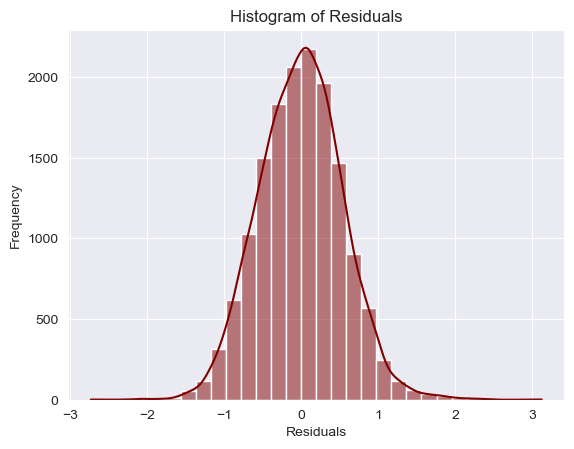

In [40]:
residuals = ordinary_least_squares_model.resid

sns.set_style('darkgrid')
sns.histplot(residuals, bins=30, kde=True, color='maroon')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [46]:
y_test_pred_padded = np.zeros((6484, 21))
y_test_pred_padded[:, 2] = y_test_pred.values.flatten()
y_test_pred_original = standard_scaler.inverse_transform(y_test_pred_padded)
y_test_pred = y_test_pred_original[:, 2]
y_test_pred = y_test_pred.reshape(-1, 1)
y_test_pred = yeo_johnson.inverse_transform(y_test_pred)
y_test_pred

ValueError: operands could not be broadcast together with shapes (6484,21) (25,) (6484,21) 

In [41]:

submission_dataframe = pd.DataFrame({
    'index': X_test.index,
    'Price': y_test_pred
})
submission_dataframe.head(2)

,index,Price
17384,17384,-0.165989
722,722,1.862267
